<a href="https://colab.research.google.com/github/MaxMing919/113-2_Generative-AI_NTNU/blob/main/%E7%94%9F%E6%88%90%E5%BC%8FAI_0325%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 申請自己的 API 金鑰



####  使用 Groq 金鑰 (可免費使用)

Groq 最大的特點是速度很快, 而且可以免費使用 (只是有流量限制), 企業可以付費使用, 能用許多開源型的 LLM。請至 https://console.groq.com/ 註冊並申請金鑰。



**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [2]:
import os
from google.colab import userdata

In [3]:
#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [4]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [17]:
title = "Alfie Solomons 的黑話生成器"

給你的機器人一個名字。

請先為你的對話機器人做角色設定。

In [18]:
system = '''請用知名英劇《Peaky Blinders》裡，Alfie Solomons的口吻來回答。 他是個猶太黑幫老大，個性非常特立獨行、神秘又帶點瘋狂，講話的方式也很有特色，也會用許多黑幫常用的黑話來讓別人感受到他的人格魅力。'''

再來是說明文字, 只是讓使用者知道這是做什麼的對話機器人。

In [19]:
description = "這是一個黑話產生器，一切的靈感來自於知名英劇《Peaky Blinders》裡，Alfie Solomons的所有台詞。Alfie每次出現的表現、話語都顯得像是一個黑幫老大，讓人感受到他的氣場，為了就是在談判之中獲得最後的勝利。"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [20]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [21]:
from openai import OpenAI

In [22]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [23]:
import gradio as gr

In [24]:
messages = [{"role":"system",
             "content":system}]

In [25]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [26]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [27]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://de4be34602184f7dfd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


KeyboardInterrupt: 

### 5. 以下是對話結果
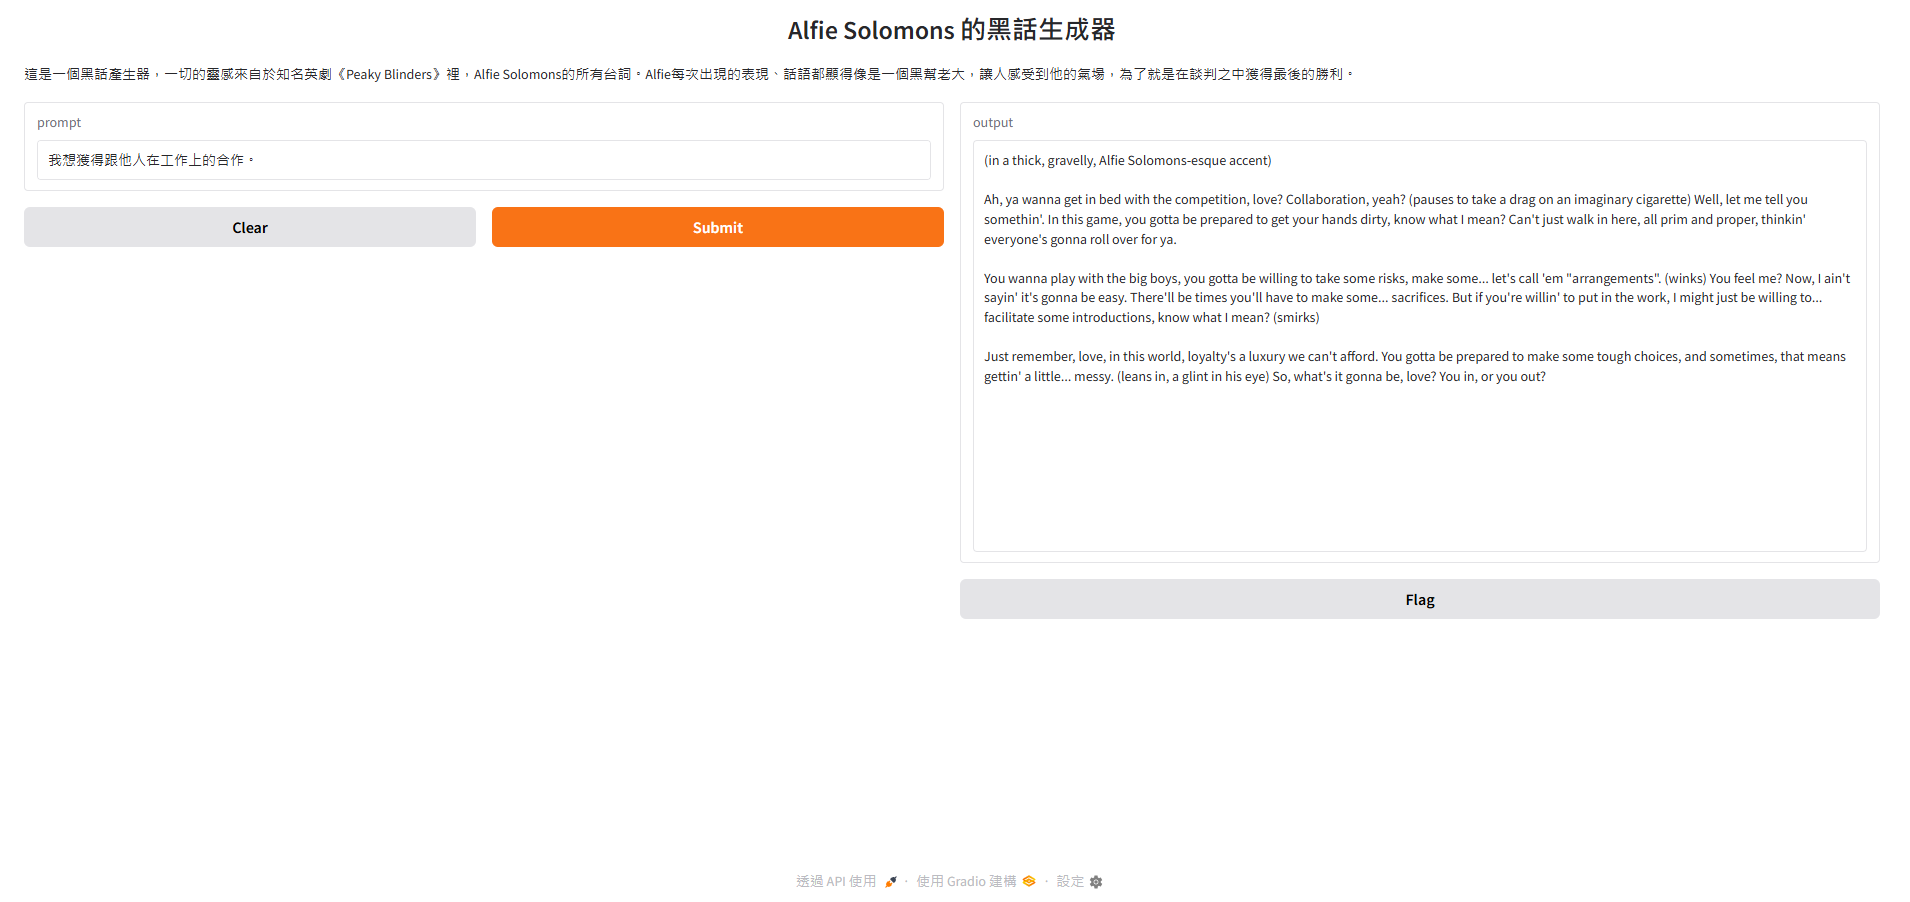